# Visuals

In [9]:
import re
import unicodedata
from wordcloud import WordCloud
import pandas as pd
import nltk
import env

import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import os

# try each indivudal palette
palettes = ["ocean", "deep", "pastel", "muted", "dark", "colorblind"]

# Set the Seaborn style to match the oceans16 theme
sns.set_theme(style="white", palette="ocean")

In [10]:
train, val, test = wrangle.wrangle_readmes()

Returning Python and Java-script data


In [11]:
# get data
df = train[["language","lemmatized"]]
df.head()

,language,lemmatized
30,Python,google automation python professional certific...
75,JavaScript,movie review database
35,JavaScript,coding train webgithub thecodingtraincom contr...
37,Python,face recognition using tensorflow tensorflow i...
78,JavaScript,eatheblocksblockchain tutorial eattheblocks le...


In [12]:
py = df.lemmatized[df.language == "Python"]
js = df.lemmatized[df.language == "JavaScript"]
py_js = df.lemmatized
py.head()

30    google automation python professional certific...
37    face recognition using tensorflow tensorflow i...
62    english espanol stateoftheart machine learning...
78    bert new march 11th 2020 smaller bert model re...
63                         removed according regulation
Name: lemmatized, dtype: object

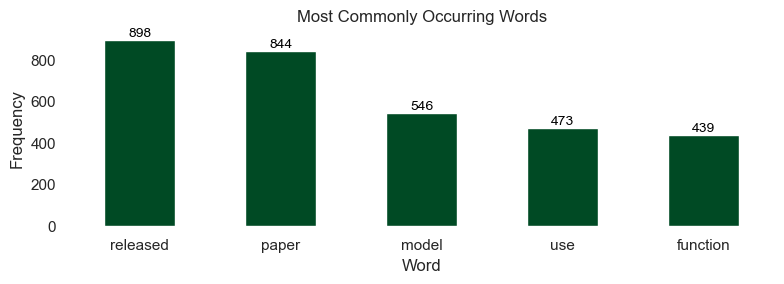

In [28]:
plt.figure(figsize=(8, 3))
# Assuming py_js is defined elsewhere in your code
word_series = pd.Series(" ".join(py_js).split())
top_words = word_series.value_counts().head(5)
top_words.plot(kind="bar")

plt.title("Most Commonly Occurring Words")
plt.ylabel("Frequency")
plt.xlabel("Word")
# Turn off the boundary lines
plt.gca().spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.xticks(rotation=0)

# Annotate the bar plot with values
for index, value in enumerate(top_words):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()

# Save the plot to your directory
output_directory = "." 
output_filename = "common_words_plot.png"
output_path = os.path.join(output_directory, output_filename)
plt.savefig(output_path)

plt.show()

**Words in readme that uniqely identify python or javascript**

In [27]:
py_df = pd.Series(" ".join(py).split()).value_counts()
js_df = pd.Series(" ".join(js).split()).value_counts()
all_df = pd.Series(" ".join(py_js).split()).value_counts()

freq_df = pd.concat([py_df, js_df, all_df], axis=1).set_axis(["py", "js", "all"], axis=1)
freq_df = freq_df.fillna(0)
freq_df.head()

,py,js,all
released,896.0,2.0,898
paper,844.0,0.0,844
model,531.0,15.0,546
transformer,355.0,0.0,355
language,274.0,9.0,283


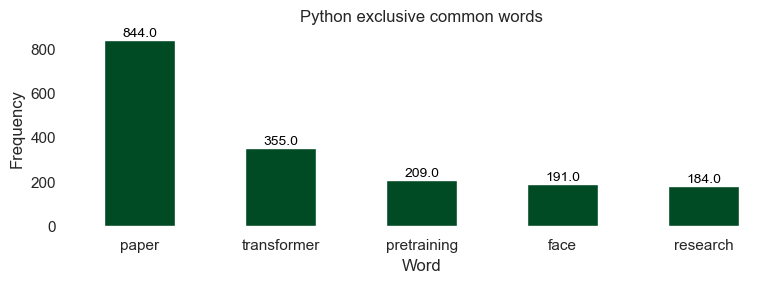

In [29]:
plt.figure(figsize=(8, 3))
# Assuming py_js is defined elsewhere in your code
top_words = freq_df["py"][freq_df["js"] == 0].head(5)
top_words.plot(kind="bar")

plt.title("Python exclusive common words")
plt.ylabel("Frequency")
plt.xlabel("Word")
# Turn off the boundary lines
plt.gca().spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.xticks(rotation=0)

# Annotate the bar plot with values
for index, value in enumerate(top_words):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.tight_layout()

# Save the plot to your directory
output_directory = "." 
output_filename = "python_common_words_plot.png"
output_path = os.path.join(output_directory, output_filename)
plt.savefig(output_path)

plt.show()

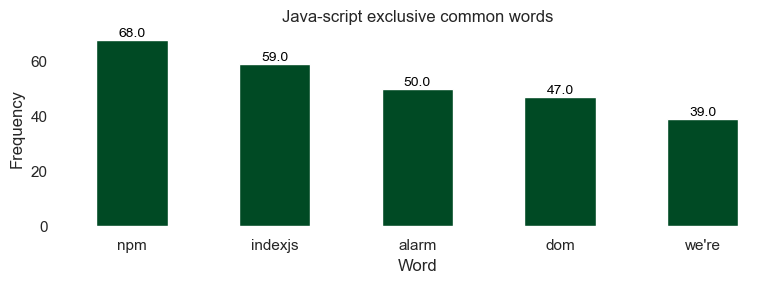

In [30]:
plt.figure(figsize=(8, 3))
# Assuming py_js is defined elsewhere in your code
top_words = freq_df["js"][freq_df["py"] == 0].head(5)
top_words.plot(kind="bar")

plt.title("Java-script exclusive common words")
plt.ylabel("Frequency")
plt.xlabel("Word")
# Turn off the boundary lines
plt.gca().spines[['top', 'bottom', 'right', 'left']].set_visible(False)
plt.xticks(rotation=0)

# Annotate the bar plot with values
for index, value in enumerate(top_words):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10, color='black')
    
plt.tight_layout()

# Save the plot to your directory
output_directory = "." 
output_filename = "javascript_common_words_plot.png"
output_path = os.path.join(output_directory, output_filename)
plt.savefig(output_path)

plt.show()